In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
df = pd.read_csv('output_finall.csv')

In [5]:
df

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08
...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08


In [6]:
train_dates = pd.to_datetime(df['DATE'])

In [7]:
from sklearn.impute import SimpleImputer
# Impute missing values in 'SHARES_TRADED' using SimpleImputer (replace with 'median' or 'most_frequent' as needed)
imputer = SimpleImputer(strategy='mean')
df['SHARES_TRADED'] = imputer.fit_transform(df[['SHARES_TRADED']])

# Use the imputed dataframe for further processing


In [8]:
missing_values = df.isna().sum()

In [9]:
missing_values

DATE             0
OPEN             0
HIGH             0
CLOSE            0
LOW              0
SHARES_TRADED    0
dtype: int64

In [10]:
df1=df[['OPEN','CLOSE','LOW','HIGH','SHARES_TRADED']]

In [11]:
df1

,OPEN,CLOSE,LOW,HIGH,SHARES_TRADED
0,7788.25,7915.20,7771.70,7937.75,2.184224e+08
1,7877.60,7783.35,7772.85,7885.10,1.702674e+08
2,7838.80,7825.00,7819.10,7847.95,2.238044e+07
3,7762.45,7762.25,7730.90,7775.10,1.658768e+08
4,7732.95,7806.60,7714.15,7838.85,1.541349e+08
...,...,...,...,...,...
2127,23179.50,21884.50,21281.45,23179.50,1.006105e+09
2128,22128.35,22620.35,21791.95,22670.40,6.384871e+08
2129,22798.60,22821.40,22642.60,22910.15,4.804133e+08
2130,22821.85,23290.15,22789.05,23320.20,4.735549e+08


In [12]:
df1.dtypes

OPEN             float64
CLOSE            float64
LOW              float64
HIGH             float64
SHARES_TRADED    float64
dtype: object

In [13]:
missing_values = df.isna().sum()
print(missing_values)

DATE             0
OPEN             0
HIGH             0
CLOSE            0
LOW              0
SHARES_TRADED    0
dtype: int64


In [14]:
#df_original = df[['DATE','CLOSE']]

In [17]:
# df_filtered

In [18]:
df1 = df1.astype(float)

In [19]:
df1.dtypes

OPEN             float64
CLOSE            float64
LOW              float64
HIGH             float64
SHARES_TRADED    float64
dtype: object

In [20]:
scaler = StandardScaler()
scaler = scaler.fit(df1)
df_scaled = scaler.transform(df1)

In [21]:

len(df1)

2132

In [23]:
df1.shape

(2132, 5)

In [24]:
train_X=[]
train_Y = []

n_future = 1
n_past = 30

for i in range(n_past, len(df_scaled) - n_future + 1):
    train_X.append(df_scaled[i - n_past:i, 0:df1.shape[1]])
    train_Y.append(df_scaled[i + n_future - 1: i + n_future,0])

train_X, train_Y = np.array(train_X), np.array(train_Y)

print('train_X shape == {}.'.format(train_X.shape))
print('train_Y shape == {}.'.format(train_Y.shape))


train_X shape == (2102, 30, 5).
train_Y shape == (2102, 1).


In [25]:
print(train_Y)

[[-1.28641218]
 [-1.27274931]
 [-1.27873707]
 ...
 [ 2.22144138]
 [ 2.22689012]
 [ 2.34343462]]


In [26]:
print(train_X)

[[[-1.29630194 -1.26445225 -1.28648975 -1.2710587  -0.64535902]
  [-1.27536236 -1.2953532  -1.28621899 -1.28335388 -0.88992817]
  [-1.28445532 -1.28559192 -1.27532951 -1.2920294  -1.64101553]
  ...
  [-1.28677543 -1.30036859 -1.29081023 -1.29478501 -0.75253448]
  [-1.30628544 -1.28337717 -1.29549564 -1.29371079 -1.09355381]
  [-1.28665825 -1.29470869 -1.2852772  -1.29241471 -1.09630028]]

 [[-1.27536236 -1.2953532  -1.28621899 -1.28335388 -0.88992817]
  [-1.28445532 -1.28559192 -1.27532951 -1.2920294  -1.64101553]
  [-1.30234829 -1.30029829 -1.29609604 -1.30904181 -0.91222709]
  ...
  [-1.30628544 -1.28337717 -1.29549564 -1.29371079 -1.09355381]
  [-1.28665825 -1.29470869 -1.2852772  -1.29241471 -1.09630028]
  [-1.28641218 -1.27599469 -1.27368138 -1.28654152 -1.13770569]]

 [[-1.28445532 -1.28559192 -1.27532951 -1.2920294  -1.64101553]
  [-1.30234829 -1.30029829 -1.29609604 -1.30904181 -0.91222709]
  [-1.30926174 -1.28990422 -1.30003979 -1.29415449 -0.97186195]
  ...
  [-1.28665825 -1.

In [27]:
print(train_X.shape[0]), print(train_X.shape[1]) , print(train_X.shape[2])

2102
30
5


(None, None, None)

In [28]:
train_Y.shape[1]

1

In [29]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_Y.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(train_X, train_Y, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/100
30/30 [==============================] - 4s 46ms/step - loss: 0.1738 - val_loss: 0.0193
Epoch 2/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0322 - val_loss: 0.0662
Epoch 3/100
30/30 [==============================] - 1s 32ms/step - loss: 0.0231 - val_loss: 0.0305
Epoch 4/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0206 - val_loss: 0.0874
Epoch 5/100
30/30 [==============================] - 1s 50ms/step - loss: 0.0196 - val_loss: 0.0247
Epoch 6/100
30/30 [==============================] - 2s 53ms/step - loss: 0.0194 - val_loss: 0.0139
Epoch 7/100
30/30 [==============================] - 1s 36ms/step - loss: 0.0176 - val_loss: 0.0081
Epoch 8/100
30/30 [==============================] - 1s 31ms/step - loss: 0.0195 - val_loss: 0.0417
Epoch 9/100
30/30 [==============================] - 1s 31ms/step - loss: 0.0194 - val_loss: 0.0392
Epoch 10/100
30/30 [==============================] - 1s 31ms/step - loss: 0.0195 - val_loss: 0.0113

In [31]:
n_future = 30  # Number of future time steps to predict
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

In [32]:
forecast_period_dates

[Timestamp('2024-06-10 00:00:00'),
 Timestamp('2024-06-11 00:00:00'),
 Timestamp('2024-06-12 00:00:00'),
 Timestamp('2024-06-13 00:00:00'),
 Timestamp('2024-06-14 00:00:00'),
 Timestamp('2024-06-15 00:00:00'),
 Timestamp('2024-06-16 00:00:00'),
 Timestamp('2024-06-17 00:00:00'),
 Timestamp('2024-06-18 00:00:00'),
 Timestamp('2024-06-19 00:00:00'),
 Timestamp('2024-06-20 00:00:00'),
 Timestamp('2024-06-21 00:00:00'),
 Timestamp('2024-06-22 00:00:00'),
 Timestamp('2024-06-23 00:00:00'),
 Timestamp('2024-06-24 00:00:00'),
 Timestamp('2024-06-25 00:00:00'),
 Timestamp('2024-06-26 00:00:00'),
 Timestamp('2024-06-27 00:00:00'),
 Timestamp('2024-06-28 00:00:00'),
 Timestamp('2024-06-29 00:00:00'),
 Timestamp('2024-06-30 00:00:00'),
 Timestamp('2024-07-01 00:00:00'),
 Timestamp('2024-07-02 00:00:00'),
 Timestamp('2024-07-03 00:00:00'),
 Timestamp('2024-07-04 00:00:00'),
 Timestamp('2024-07-05 00:00:00'),
 Timestamp('2024-07-06 00:00:00'),
 Timestamp('2024-07-07 00:00:00'),
 Timestamp('2024-07-

In [33]:
n_future

30

In [34]:
train_X

array([[[-1.29630194, -1.26445225, -1.28648975, -1.2710587 ,
         -0.64535902],
        [-1.27536236, -1.2953532 , -1.28621899, -1.28335388,
         -0.88992817],
        [-1.28445532, -1.28559192, -1.27532951, -1.2920294 ,
         -1.64101553],
        ...,
        [-1.28677543, -1.30036859, -1.29081023, -1.29478501,
         -0.75253448],
        [-1.30628544, -1.28337717, -1.29549564, -1.29371079,
         -1.09355381],
        [-1.28665825, -1.29470869, -1.2852772 , -1.29241471,
         -1.09630028]],

       [[-1.27536236, -1.2953532 , -1.28621899, -1.28335388,
         -0.88992817],
        [-1.28445532, -1.28559192, -1.27532951, -1.2920294 ,
         -1.64101553],
        [-1.30234829, -1.30029829, -1.29609604, -1.30904181,
         -0.91222709],
        ...,
        [-1.30628544, -1.28337717, -1.29549564, -1.29371079,
         -1.09355381],
        [-1.28665825, -1.29470869, -1.2852772 , -1.29241471,
         -1.09630028],
        [-1.28641218, -1.27599469, -1.27368138, 

In [35]:
missing_values = np.isnan(train_X).sum(axis=(0, 1))
if missing_values.any():
    print("WARNING: Missing values detected in training data.")
    # Impute missing values using SimpleImputer (replace with your strategy)
    #mputer = SimpleImputer(strategy='mean')
    #train_X = imputer.fit_transform(train_X)

In [36]:
missing_values

array([0, 0, 0, 0, 0])

In [38]:
forecast = model.predict(train_X[-n_future:])  # forecast

1/1 [==============================] - 0s 496ms/step


In [39]:
forecast

array([[2.1207473],
       [2.1332724],
       [2.1443577],
       [2.1424618],
       [2.1340768],
       [2.1202893],
       [2.0791802],
       [2.0477612],
       [2.0004866],
       [1.9880228],
       [1.9821997],
       [2.0187647],
       [2.0384295],
       [2.0544813],
       [2.0997472],
       [2.1175165],
       [2.0887873],
       [2.1158412],
       [2.1722834],
       [2.2264998],
       [2.228113 ],
       [2.2048602],
       [2.1499236],
       [2.0970106],
       [2.0928552],
       [2.2656102],
       [2.0896525],
       [2.110928 ],
       [2.1982315],
       [2.2642796]], dtype=float32)

In [40]:
forecast_copies = np.repeat(forecast, df1.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [41]:
y_pred_future

array([22368.934, 22422.379, 22469.682, 22461.59 , 22425.812, 22366.98 ,
       22191.566, 22057.5  , 21855.777, 21802.594, 21777.746, 21933.771,
       22017.682, 22086.174, 22279.326, 22355.148, 22232.56 , 22348.   ,
       22588.842, 22820.184, 22827.068, 22727.848, 22493.43 , 22267.648,
       22249.918, 22987.07 , 22236.252, 22327.035, 22699.562, 22981.393],
      dtype=float32)

In [42]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [43]:
df_forecast = pd.DataFrame({'DATE':np.array(forecast_dates), 'CLOSE': y_pred_future})
df_forecast['DATE'] = pd.to_datetime(df_forecast['DATE'])

In [44]:
df_forecast

,DATE,CLOSE
0,2024-06-10,22368.933594
1,2024-06-11,22422.378906
2,2024-06-12,22469.681641
3,2024-06-13,22461.589844
4,2024-06-14,22425.812500
5,2024-06-15,22366.980469
6,2024-06-16,22191.566406
7,2024-06-17,22057.500000
8,2024-06-18,21855.777344
9,2024-06-19,21802.593750


In [45]:
org = df[['DATE','CLOSE']]
org['DATE'] = pd.to_datetime(org['DATE'])
org = org.loc[org['DATE']>=pd.to_datetime('2022-11-09')]


<ipython-input-45-4a126f2b1b7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org['DATE'] = pd.to_datetime(org['DATE'])


In [46]:
print(df1.columns)

Index(['OPEN', 'CLOSE', 'LOW', 'HIGH', 'SHARES_TRADED'], dtype='object')


In [47]:
org.reset_index(drop=True, inplace=True)

In [48]:
org

,DATE,CLOSE
0,2022-11-09,18157.00
1,2022-11-10,18028.20
2,2022-11-11,18349.70
3,2022-11-14,18329.15
4,2022-11-15,18403.40
...,...,...
395,2024-06-04,21884.50
396,2024-06-05,22620.35
397,2024-06-06,22821.40
398,2024-06-07,23290.15


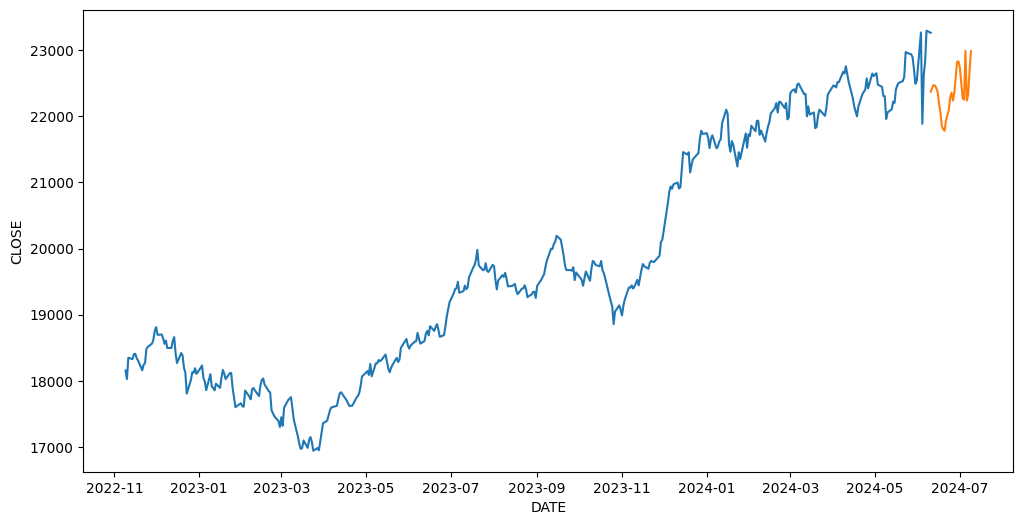

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your DataFrames `org` and `df_forecast` loaded

# Create a figure with desired size (e.g., width=12, height=6)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line chart for org data on the created axes
sns.lineplot(x="DATE", y="CLOSE", data=org, ax=ax)

# Plot the line chart for forecast data (assuming 'DATE' and 'CLOSE' exist) on the same axes
sns.lineplot(x="DATE", y="CLOSE", data=df_forecast, ax=ax)

# Optionally, customize the plot using Matplotlib functions on the axes (ax)
# plt.xlabel('Date')  # Example customization

# Display the plot
plt.show()
